# Предсказание  следующего хода

K/k — король  

Q/q — ферзь  

R/r — ладья  

B/b — слон  

N/n — конь  

P/p — пешка  

#### Расшифровка записи

7k/5p1p/p2p1Pr1/1p4pQ/8/P1P5/2pr3P/2R2K2 w - - 0 1  

w : ход белых  

— : рокировка невозможна  

— : нет возможности взятия на проходе  

0 : 0 полуходов прошло с последнего хода пешки или взятия  

1 : первый полный ход партии (начало)  

In [30]:
path_dataset_1 = 'data/fens_training_set.csv'

path_dataset_2 = 'data/fens_processed_no_turn.csv'

## 0. Разведочный анализ данных

#### Просмотр данных

    - общее количество сделанных ходов белыми и черными,  
    - количество позиций, в которых сейчас ходят белые и черные.  
    - визуализация текущей позиции (текстовый  и табличный формат) если задано число визуализаций

7k/5p1p/p2p1Pr1/1p4pQ/8/P1P5/2pr3P/2R2K2 w - - 0 1
. . . . . . . k
. . . . . p . p
p . . p . P r .
. p . . . . p Q
. . . . . . . .
P . P . . . . .
. . p r . . . P
. . R . . K . .
Всего сделано ходов белыми: 0
Всего сделано ходов черными: 0
Сколько раз ходят белые: 1
Сколько раз ходят черные: 0


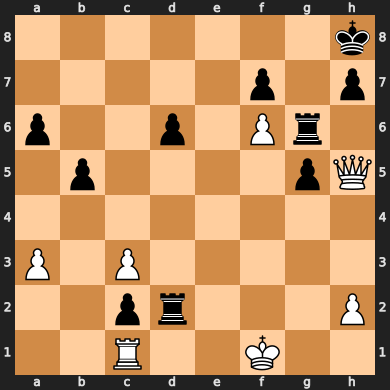

In [31]:
from utils.analiz import count_moves_and_turns

white_moves, black_moves, white_turns, black_turns, board, fen = count_moves_and_turns(path_dataset_1, count=1)
print(f"Всего сделано ходов белыми: {white_moves}")
print(f"Всего сделано ходов черными: {black_moves}")
print(f"Сколько раз ходят белые: {white_turns}")
print(f"Сколько раз ходят черные: {black_turns}")

board

#### Вывод статистики по очерёдности хода (чей следующий ход)

In [32]:
from utils.analiz import count_moves_and_turns

white_moves, black_moves, white_turns, black_turns, board, fen = count_moves_and_turns(path_dataset_1, count=None)

print(f"Всего сделано ходов белыми: {white_moves}")
print(f"Всего сделано ходов черными: {black_moves}")
print(f"Сколько раз ходят белые: {white_turns}")
print(f"Сколько раз ходят черные: {black_turns}")


Всего сделано ходов белыми: 0
Всего сделано ходов черными: 0
Сколько раз ходят белые: 268550
Сколько раз ходят черные: 0


#### Численный анализ данных

In [33]:
from utils.analiz import analyze_fen_fields

analyze_fen_fields(path_dataset_1)


Очередь хода (turn):
  w: 268550

Права на рокировку (castling):
  '-': 202925
  'KQkq': 40209
  'kq': 10396
  'KQ': 8831
  'k': 1983
  'K': 1139
  'Q': 879
  'q': 622
  'Kkq': 471
  'KQk': 396
  'Qkq': 260
  'Kk': 147
  'KQq': 138
  'Qq': 66
  'Qk': 65
  'Kq': 23

Взятие на проходе (en passant):
  '-': 268159
  'f6': 117
  'd6': 116
  'c6': 49
  'b6': 41
  'e6': 35
  'g6': 17
  'h6': 10
  'a6': 6

Счётчик полуходов (halfmove clock):
  0: 268550

Номер полного хода (fullmove number):
  1: 268550


#### Гистограммы распределения данных

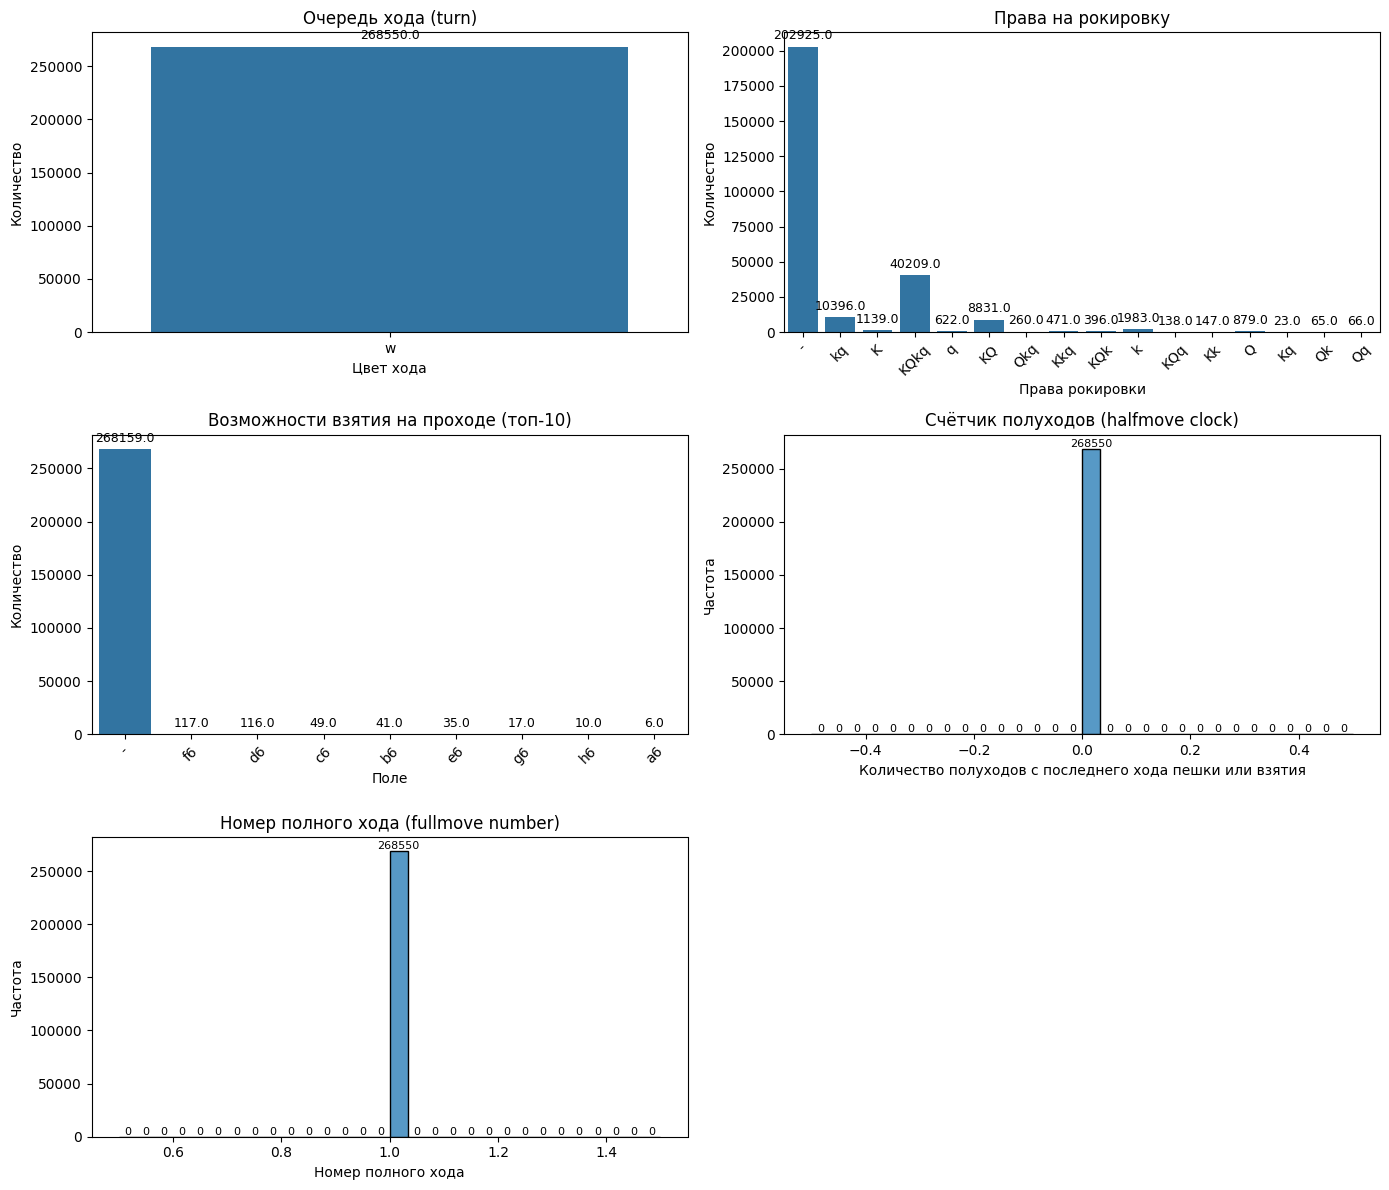

In [34]:
from utils.analiz import plot_fen_field_distribution_with_values

plot_fen_field_distribution_with_values(path_dataset_1)

#### То есть всё время ходят белые  

из датасета убираем эту информацию  

## 1. Конвертация данных 

In [35]:
from utils.convert_dataset import convert_dataset_with_info, convert_dataset_to_onehot

# конвертация датасета кратко
# convert_dataset_with_info(path_dataset_1, 'data/fens_training_set_full_info.csv')


In [36]:
#Конвертация датасета в One hot
# convert_dataset_to_onehot(path_dataset_1, 'data/fens_training_set_onehot.csv')

## 2. Датасет

In [37]:
from utils.dataset import  ChessDataset
import torch


dataset = ChessDataset(path_dataset_2)
for board, castling, label in dataset:
    print(board.shape)  # torch.Size([13, 8, 8])
    print(castling.shape)     # torch.Size([4])
    print(label)        # метка движения (int)
    break


dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

for board, castling, label in dataloader:
    print(board.shape)  # torch.Size([13, 8, 8])
    print(castling.shape)     # torch.Size([4])
    print(label.shape) 
    break


torch.Size([13, 8, 8])
torch.Size([4])
tensor(2517)
torch.Size([1, 13, 8, 8])
torch.Size([1, 4])
torch.Size([1])


#### размерность данных

#### Просмотр примера данных

In [38]:
import torch
from utils.convert_dataset import onehot_to_fen_and_text, print_board


fen_str, text_board = onehot_to_fen_and_text(board)
print(fen_str)
print_board(text_board)


R2QRBK1/P4PP1/2P1BN1P/3pP3/8/p1npp1p1/4npbp/r2q1rk1
R . . Q R B K .
P . . . . P P .
. . P . B N . P
. . . p P . . .
. . . . . . . .
p . n p p . p .
. . . . n p b p
r . . q . r k .


#### Просмотр  примера данных  (в виде шахмат)

In [39]:
from utils.convert_dataset import onehot_to_fen_and_text_unicode, print_board_unicode



fen, board_text = onehot_to_fen_and_text_unicode(board)
print(fen)
print_board_unicode(board_text)

R2QRBK1/P4PP1/2P1BN1P/3pP3/8/p1npp1p1/4npbp/r2q1rk1
♖ O O ♕ ♖ ♗ ♔ O
♙ O O O O ♙ ♙ O
O O ♙ O ♗ ♘ O ♙
O O O ♟ ♙ O O O
O O O O O O O O
♟ O ♞ ♟ ♟ O ♟ O
O O O O ♞ ♟ ♝ ♟
♜ O O ♛ O ♜ ♚ O


#### Перевернём доску в нормальное положение

In [40]:
from utils.convert_dataset import apply_move_and_get_new_board, onehot_to_board_text


print("Начальное положение:")
onehot = board[0, :12].cpu().numpy()
board_text = onehot_to_board_text(onehot)
print_board_unicode(board_text)


# fen, ascii_board = apply_move_and_get_new_board(board, castling, 0, label)
# print("\n", fen)
# print("\nПоложение после хода:")
# print(ascii_board)




Начальное положение:
♖ · · ♕ · ♖ ♔ ·
· · · · ♘ ♙ ♗ ♙
♙ · ♘ ♙ ♙ · ♙ ·
· · · · · · · ·
· · · ♙ ♟ · · ·
· · ♟ · ♝ ♞ · ♟
♟ · · · · ♟ ♟ ·
♜ · · ♛ ♜ ♝ ♚ ·


## 3. Модель

In [ ]:
from utils.models import ChessNetImproved

model = ChessNetImproved()

logits = model(board, castling)

print(logits.shape)  # [batch_size, 4096]


torch.Size([1, 4096])


In [42]:
logits

tensor([[-0.0186, -0.1054,  0.0954,  ...,  0.1506, -0.0893,  0.0164]],
       grad_fn=<AddmmBackward0>)

## Тренировка

In [43]:
from utils.train import print_metrics_table
file_path = "train_analize.csv" 
print_metrics_table(file_path)


            model  epochs  learning_rate  train_loss  train_accuracy  val_loss  val_accuracy
0             CNN      50          0.001    0.379692        0.881035  2.078201      0.736436
1             VIT      50          0.001    1.255313        0.621387  1.674770      0.632992
2  CNNTransformer      50          0.001    0.333794        0.897048  1.417589      0.761274


Модель с наибольшей метрикой (___val_accuracy___) -  __CNNTransformer__ (CNN + трансформер),   

но самая быстрая по скорости обучения и инференса   - модель CNN.  

Для демонстрации будем использовать __CNN__.  

## Инференс

#### Генерация легальных ходов

In [44]:
# Начальная позиция
fen = "7k/5p1p/p2p1Pr1/1p4pQ/8/P1P5/2pr3P/2R2K2 w - - 0 1"

Возможные ходы:
['h5h7', 'h5h6', 'h5g6', 'h5g5', 'h5h4', 'h5g4', 'h5h3', 'h5f3', 'h5e2', 'h5d1', 'f1g1', 'f1e1', 'c1c2', 'c1e1', 'c1d1', 'c1b1', 'c1a1', 'c3c4', 'a3a4', 'h2h3', 'h2h4']
Индексы возможных ходов:
[2551, 2543, 2542, 2534, 2527, 2526, 2519, 2517, 2508, 2499, 326, 324, 138, 132, 131, 129, 128, 1178, 1048, 983, 991]


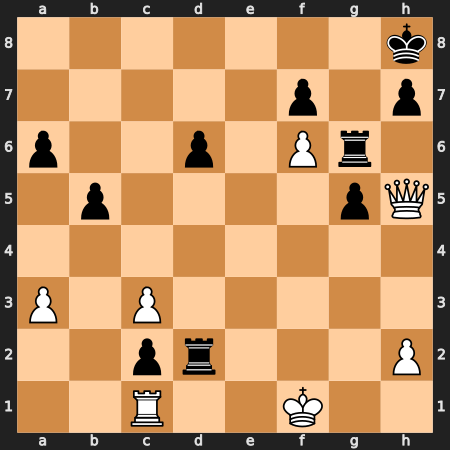

In [45]:
# Возможные ходы

from utils.predict import get_legal_moves

legal_move_indices, board1 = get_legal_moves(fen)


#### Загрузка из датасета

In [46]:
from utils.dataset import  ChessDataset
import torch
path_dataset_2 = 'data/fens_processed_no_turn.csv'

dataset = ChessDataset(path_dataset_2)
for board, castling, label in dataset:
    print(board.shape)  
    print(castling.shape)    
    print(label)       
    break


dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

for board, castling, label in dataloader:
    print(board.shape)  
    print(castling.shape)     
    print(label.shape) 
    break


torch.Size([13, 8, 8])
torch.Size([4])
tensor(2517)
torch.Size([1, 13, 8, 8])
torch.Size([1, 4])
torch.Size([1])


#### Преобразуем  пример датасета в формат FEN

In [ ]:
from utils.convert_dataset import  get_fen_and_label

idx = 221  # Номер примера в датасете
board, castling, label = dataset[idx]

fen_str, move_label = get_fen_and_label(board, castling, label,  turn_char='w')
print("Исходная позиция:")
print(fen_str)
print("Ход:")
print(move_label)


Исходная позиция:
8/2p2p2/7k/4p3/3qP3/3B1PR1/5K2/4N3 w - - 0 1
Ход:
f2e2


Возможные ходы:
['f2g2', 'f2e2', 'f2f1']
Индексы возможных ходов:
[846, 844, 837]


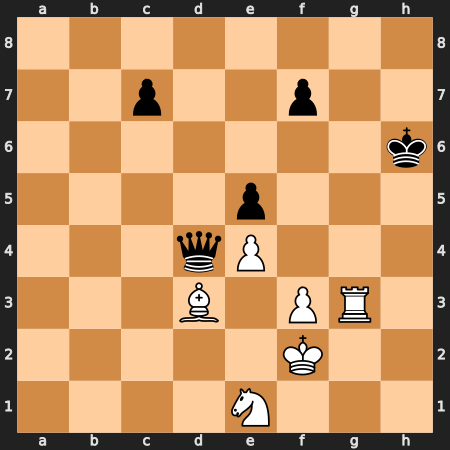

In [48]:
from utils.predict import get_legal_moves

legal_move_indices, board1 = get_legal_moves(fen_str)


#### Выход модели — вероятности всех 4096 ходов

In [49]:
from utils.models import ChessNetMultiInput, ChessNetImproved

model = ChessNetImproved()
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"
model.to(device)
board3 = board.unsqueeze(0)      
castling3 = castling.unsqueeze(0)
logits = model(board3, castling3)

print("Логиты")
print(logits.shape) 
print(logits)

Логиты
torch.Size([1, 4096])
tensor([[-0.0053,  0.0184,  0.0119,  ..., -0.0269, -0.0211, -0.0074]],
       grad_fn=<AddmmBackward0>)


In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F



probs = F.softmax(logits, dim=1).detach().cpu().numpy()
print(" вероятности")
print(probs)


 вероятности
[[0.0002429  0.00024873 0.0002471  ... 0.00023771 0.00023908 0.00024239]]


#### Фильтрация вероятностей по легальным ходам

In [51]:
import numpy as np

probs_1d = probs[0]


legal_probs = probs_1d[legal_move_indices]
best_idx = legal_move_indices[np.argmax(legal_probs)]
print("Индекс хода:")
print(best_idx)

Индекс хода:
844


#### Ход из индекса

In [52]:
from utils.convert_dataset import index_to_move

index_to_move(best_idx)

'f2e2'

In [53]:
fen_str, move_label = get_fen_and_label(board, castling, label,  turn_char='w')
print("Исходная позиция:")
print(fen_str)
print("Ход:")
print(move_label)

Исходная позиция:
8/2p2p2/7k/4p3/3qP3/3B1PR1/5K2/4N3 w - - 0 1
Ход:
f2e2


Возможные ходы:
['f2g2', 'f2e2', 'f2f1']
Индексы возможных ходов:
[846, 844, 837]


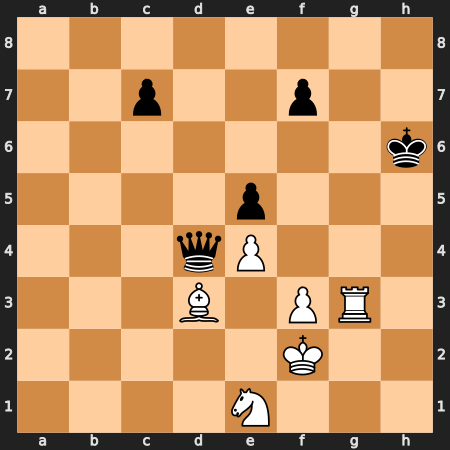

In [54]:
legal_move_indices, board1 = get_legal_moves(fen_str)

#### Вывод всех параметров

Логиты:
torch.Size([1, 4096])
tensor([[-0.0053,  0.0184,  0.0119,  ..., -0.0269, -0.0211, -0.0074]],
       grad_fn=<AddmmBackward0>)

Исходная позиция:
8/2p2p2/7k/4p3/3qP3/3B1PR1/5K2/4N3 w - - 0 1

Реальный ход:
f2e2

Вероятности:
[[0.0002429  0.00024873 0.0002471  ... 0.00023771 0.00023908 0.00024239]]
Возможные ходы:
['f2g2', 'f2e2', 'f2f1']
Индексы возможных ходов:
[846, 844, 837]


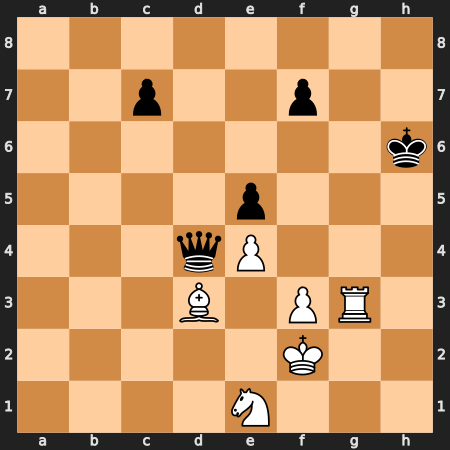


Индекс предсказанного хода:
844


In [55]:

from utils.predict import predict_move

best_idx, fen_str, move_label = predict_move(model, board, castling, label)

### Предсказание хода

In [56]:
from utils.predict import display_positions_after_moves

In [57]:
idx = 221

board_tensor, castling_tensor, label = dataset[idx]

Логиты:
torch.Size([1, 4096])
tensor([[-0.0053,  0.0184,  0.0119,  ..., -0.0269, -0.0211, -0.0074]],
       grad_fn=<AddmmBackward0>)

Исходная позиция:
8/2p2p2/7k/4p3/3qP3/3B1PR1/5K2/4N3 w - - 0 1

Реальный ход:
f2e2

Вероятности:
[[0.0002429  0.00024873 0.0002471  ... 0.00023771 0.00023908 0.00024239]]
Возможные ходы:
['f2g2', 'f2e2', 'f2f1']
Индексы возможных ходов:
[846, 844, 837]


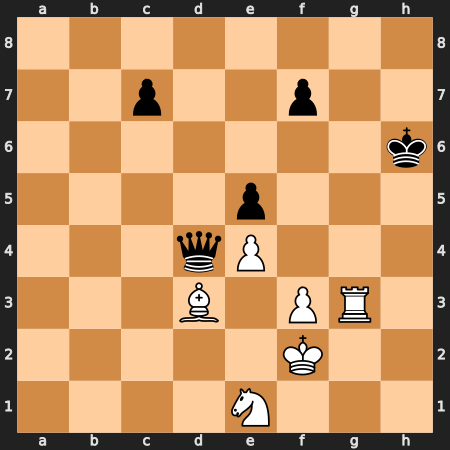


Индекс предсказанного хода:
844


In [58]:
best_idx, fen_str, move_label = predict_move(model, board_tensor, castling_tensor, label)

--------------------------------
Исходная позиция:


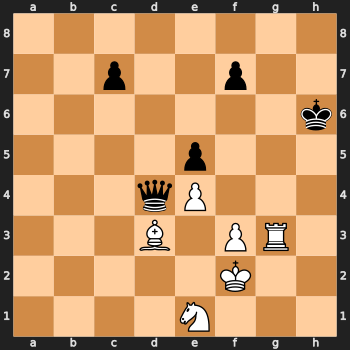

Позиция после предсказанного хода:


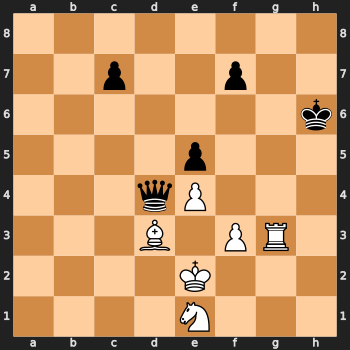

Позиция после реального хода:


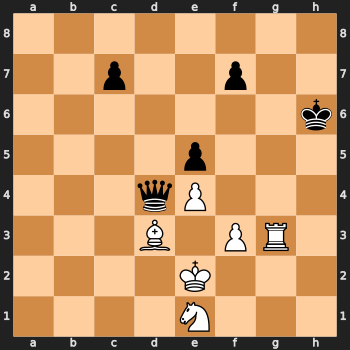

In [59]:

display_positions_after_moves(board_tensor, castling_tensor, label, best_idx, turn_char='w')


## Резюме.  

```
Так как в датасете представлены ходы только белых фигур, то модели обучались для следующего хода белыми.  

Возможно следует применить "аугментацию данных" перевернуть доски  и поменять цвет фигур, для возможности предсказания хода чёрных.  

```


Были обучены три модели CNN, VIT, CNN+трансформер.  

CNN самая быстрая модель.  CNN+трансформер показал лучшие метрики на валидации.  

Так же была использована графовая модель, но у неё слишком медленное обучение (не обучилась).    

  
Для обучения применялись:  

- Метрика качества  - точность (accuracy). 

- Функция потерь  - CrossEntropyLoss.  






## Дополнительно  

```

описать, как будете решать задачу:  

```
- как сыграет конкретный игрок - особенности игры/стиль,  
- необходимое количество партий,   
- будет ли модель по игроку отличаться от общей и как.




Для решения задачи, как сыграет конкретный игрок, необходимо собрать датасет партий конкретного игрока.  

Для выявления стиля игрока  возможно необходим датасет с историей ходов  (требуется другая модель).   

Так же для контекста в датасете должны быть представлены  партии других игроков.  

Модель учится определять  ход конкретного игрока, в соответствии с его стилем.  Разные игроки имеют свои предпочтения:

- жертвы фигур
- определённые дебюты  
- позиции  

Общая модель обученная на всех партиях, дообучается на примерах конкретного игрока.  

Для обучения общей модели требуется большой датасет(в зависимости от модели).

Для адаптации модели под конкретного игрока  (fine-tuned) требуется меньший датасет.  

Общая модель  предсказывает ходы исходя из общие закономерности.  

Модель обученная под конкретного игрока предсказывает ходы, учитывая  ошибки, закономерности  и стратегию игрока.  

